# 1. 匯入常用套件 & 設定資料路徑

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件

import warnings
warnings.filterwarnings('ignore')

import scipy.stats as st

#系統操作、解壓縮檔案
import os
from zipfile import ZipFile

# 設定 
dir_data = './data/'
dir_submit = './submit/'
filename = 'house-prices.zip'

# 2. 定義Function

In [2]:
# 查看資料內容
def columns_type(df_data):
    dtype_df = df_data.dtypes.reset_index()
    dtype_df.columns = ['Columns', 'Type']
    dtype_df_count = dtype_df.groupby(['Type'])['Columns'].count().reset_index()
    for t, n in zip(dtype_df_count.Type, dtype_df_count.Columns):
        print('類型 : ',t,'\n')
        print('  個數 : ',n,'\n')
        print('  ',list(dtype_df[dtype_df.Type==t].Columns),'\n')
        print('-----------------------------------------------\n')
        
def object_check(df_data):    
    object_type = df_data.select_dtypes(include=["object"]).apply(pd.Series.nunique, axis = 0).reset_index() 
    object_type.columns = ["Column", "Unique Count"]
    display(object_type.head(10))        
        
# 檢查 DataFrame 空缺值的狀態
def na_check(df_data,df_test):
    df_data_na = (df_data.isnull().sum() / len(df_data)) * 100
    df_data_na = df_data_na.drop(df_data_na[df_data_na == 0].index).sort_values(ascending=False)
    train_missing_data = pd.DataFrame({'Train_Missing Ratio' :df_data_na}).reset_index().rename(columns={'index':'Columns'})
    df_test_na = (df_test.isnull().sum() / len(df_test)) * 100
    df_test_na = df_test_na.drop(df_test_na[df_test_na == 0].index).sort_values(ascending=False)
    test_missing_data = pd.DataFrame({'Test_Missing Ratio' :df_test_na}).reset_index().rename(columns={'index':'Columns'})
    missing_data = pd.merge(train_missing_data,test_missing_data, on= 'Columns',how='outer')    
    display(missing_data)

# 3. 匯入資料

In [3]:
# 查看壓縮檔內的資料
f_path = os.path.join(dir_data, filename)
print('Path of read in data: %s' % (f_path))

myzip=ZipFile(f_path)
for i in myzip.filelist:
    print(i.filename)

Path of read in data: ./data/house-prices.zip
data_description.txt
sample_submission.csv
test.csv
train.csv


In [4]:
# 讀取壓縮檔內的資料
f=myzip.open('train.csv')
train=pd.read_csv(f)
f.close()

f=myzip.open('test.csv')
test=pd.read_csv(f)
f.close()

myzip.close()

# 4. ETL & EDA
### ref : https://www.kaggle.com/dgawlik/house-prices-eda

In [5]:
print('Train data :{}'.format(train.shape))
print('Test data :{}'.format(test.shape))
print('\n')
columns_type(train)
object_check(train)
print('\n')
print('train data na_check')
na_check(train,test)
# print('\n')
# print('test data na_check')
# na_check(test)

Train data :(1460, 81)
Test data :(1459, 80)


類型 :  int64 

  個數 :  35 

   ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'] 

-----------------------------------------------

類型 :  float64 

  個數 :  3 

   ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'] 

-----------------------------------------------

類型 :  object 

  個數 :  43 

   ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', '

,Column,Unique Count
0,MSZoning,5
1,Street,2
2,Alley,2
3,LotShape,4
4,LandContour,4
5,Utilities,2
6,LotConfig,5
7,LandSlope,3
8,Neighborhood,25
9,Condition1,9




train data na_check


,Columns,Train_Missing Ratio,Test_Missing Ratio
0,PoolQC,99.520548,99.794380
1,MiscFeature,96.301370,96.504455
2,Alley,93.767123,92.666210
3,Fence,80.753425,80.123372
4,FireplaceQu,47.260274,50.034270
5,LotFrontage,17.739726,15.558602
6,GarageYrBlt,5.547945,5.346127
7,GarageType,5.547945,5.209047
8,GarageFinish,5.547945,5.346127
9,GarageQual,5.547945,5.346127


### 訓練資料中，有35個整數型、3個浮點數型和43個類別型；再Missing Values部分，Test資料在較多欄位中有NA
### 分別取出 數量型變數(36) 與 類別型變數(43)

In [6]:
number_features=[]
object_features = []
for dtype, feature in zip(train.dtypes, train.columns):
    if dtype == 'object':
        object_features.append(feature)
    else :
        number_features.append(feature)
number_features.remove('SalePrice')
number_features.remove('Id')
print(f'{len(object_features)} Object Features : {object_features}\n')
print(f'{len(number_features)} Number_Features : {number_features}\n')

43 Object Features : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

36 Number_Features : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'Garage

In [7]:
def missing_etl(dt, object_features, number_features):
    for c1 in object_features:
        dt[c1] = dt[c1].fillna('Missing')
    for c2 in number_features:
        dt[c2] = dt[c2].fillna(dt[c2].median())
    return dt

In [8]:
train = missing_etl(dt = train, object_features = object_features, number_features = number_features)

## Y變數：SalePrice

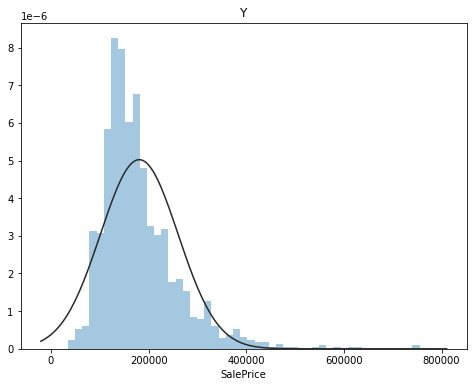

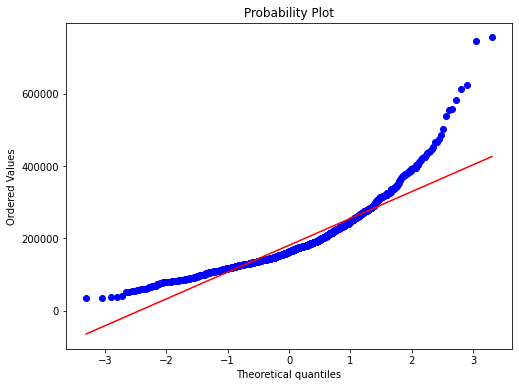

In [9]:
plt.figure(1,figsize=(8, 6))
plt.title('Y')
sns.distplot(train['SalePrice'], 
             kde=False, 
             fit=st.norm)

plt.figure(2,figsize=(8, 6))
res = st.probplot(train['SalePrice'],plot=plt)

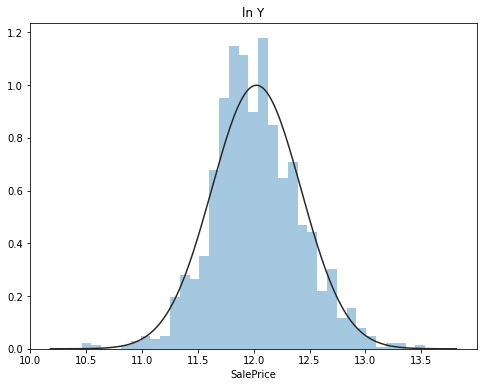

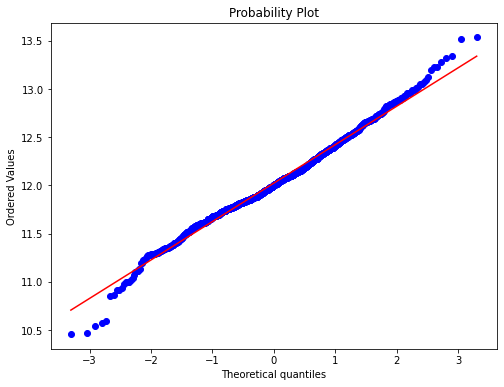

In [10]:
plt.figure(1,figsize=(8, 6))
plt.title('ln Y')
sns.distplot(np.log1p(train['SalePrice']), 
             kde=False, 
             fit=st.norm)

plt.figure(2,figsize=(8, 6))
res = st.probplot(np.log1p(train['SalePrice']),plot=plt)

## X變數

### 數量型

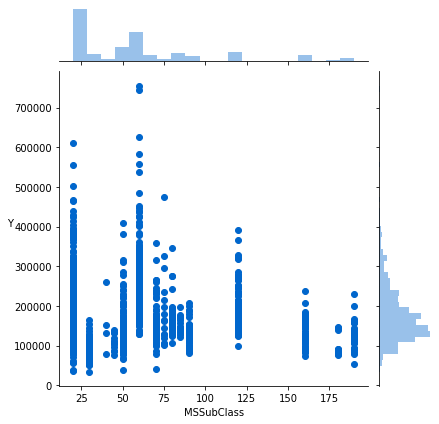

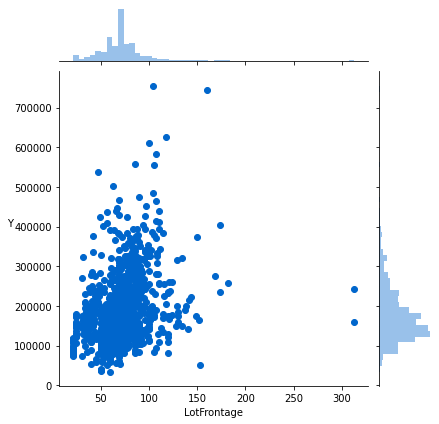

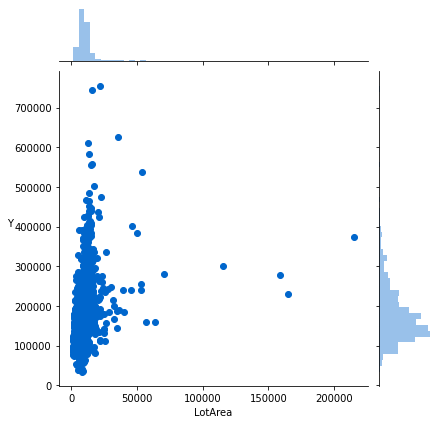

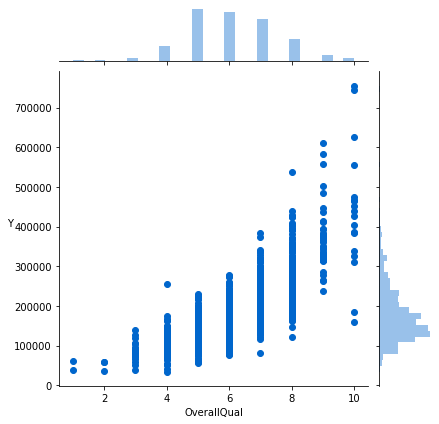

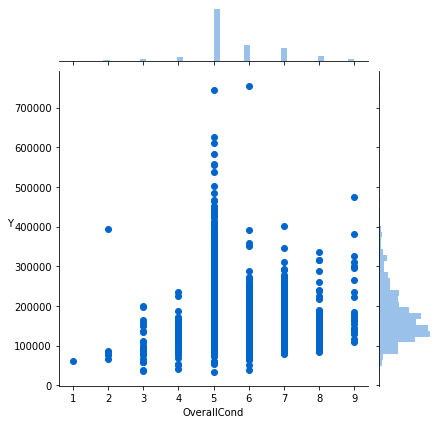

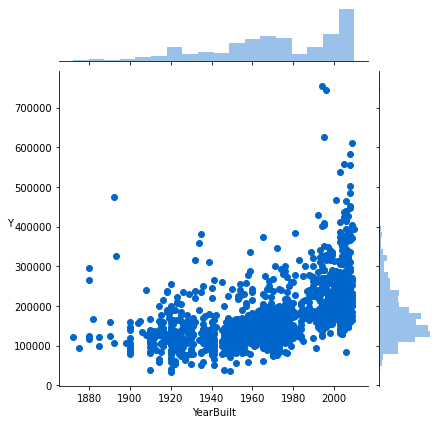

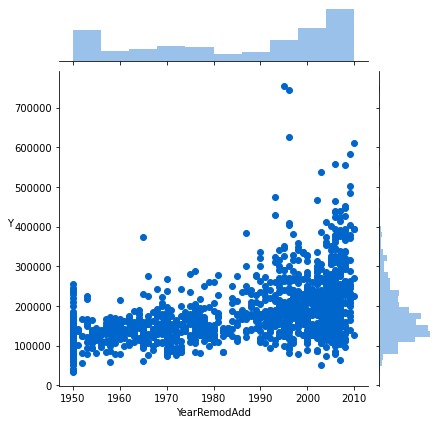

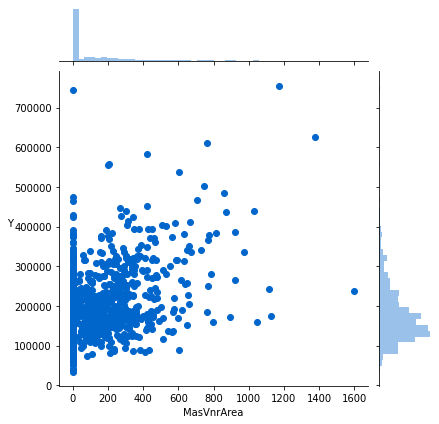

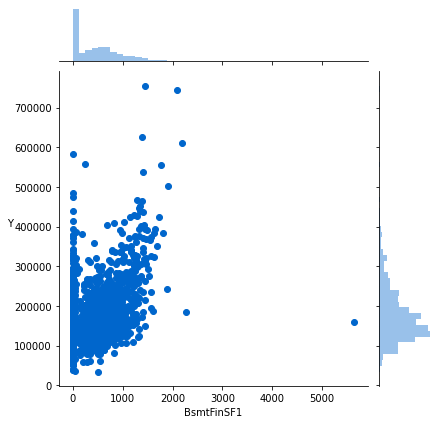

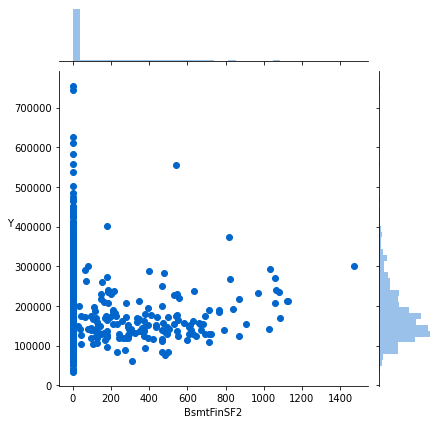

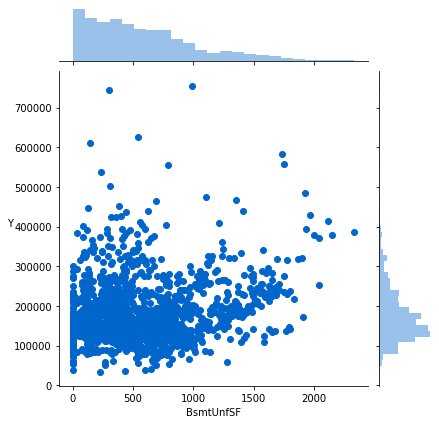

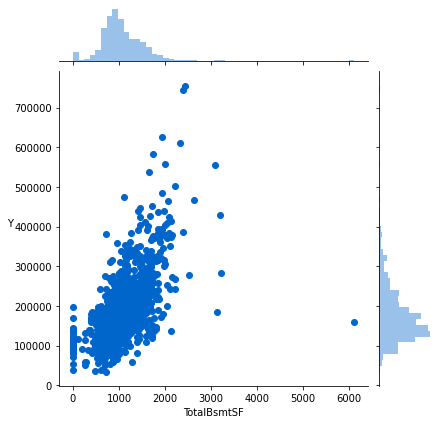

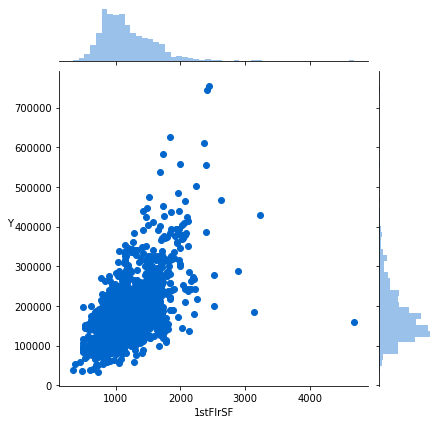

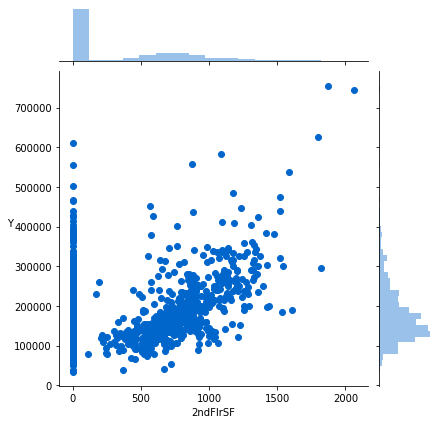

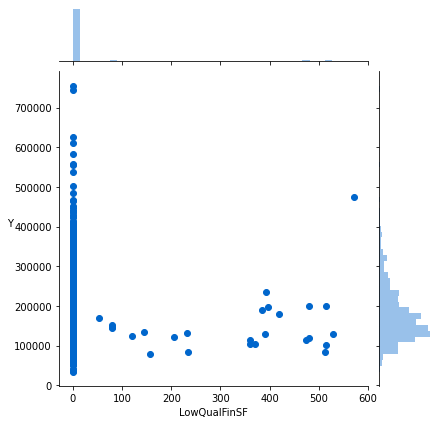

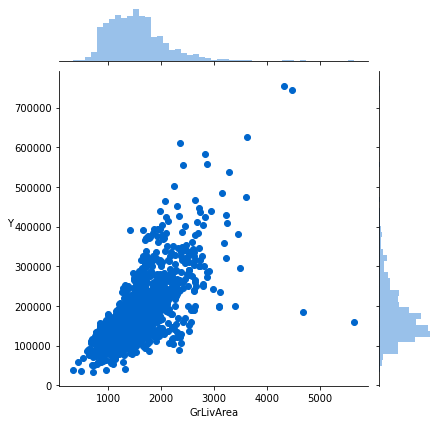

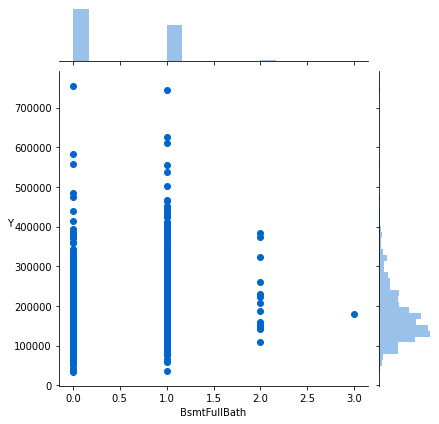

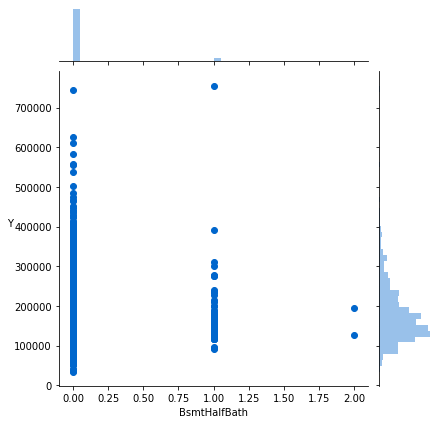

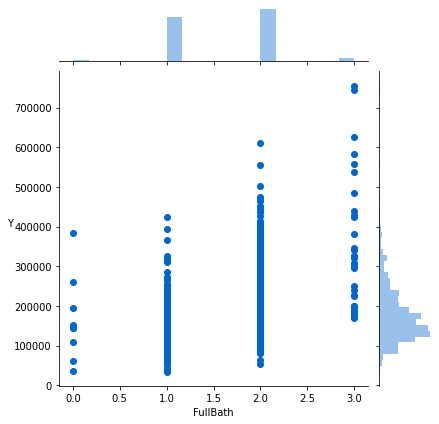

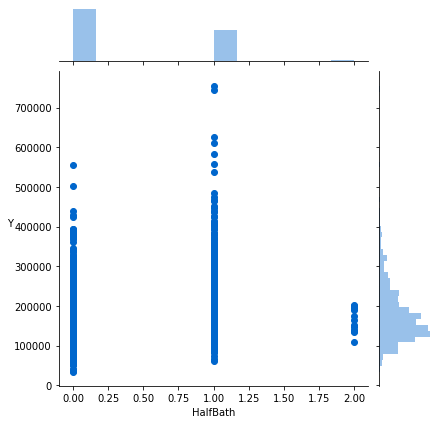

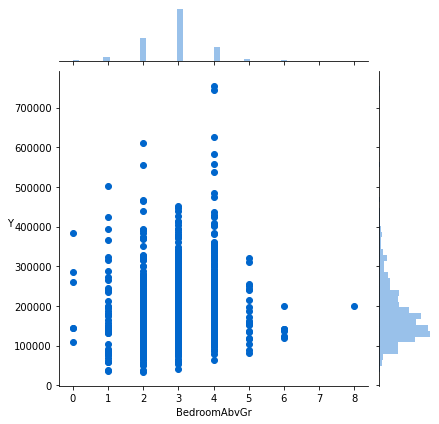

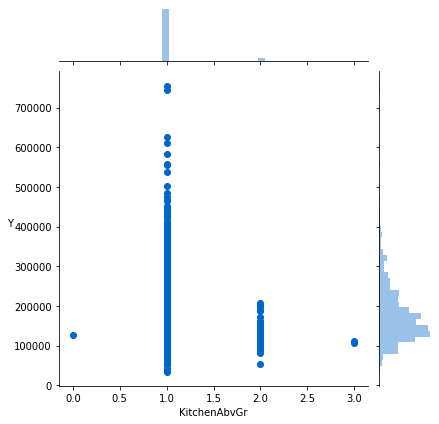

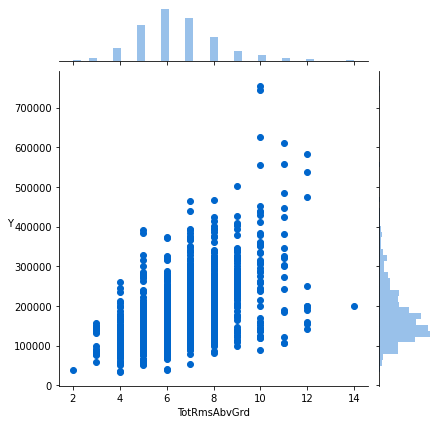

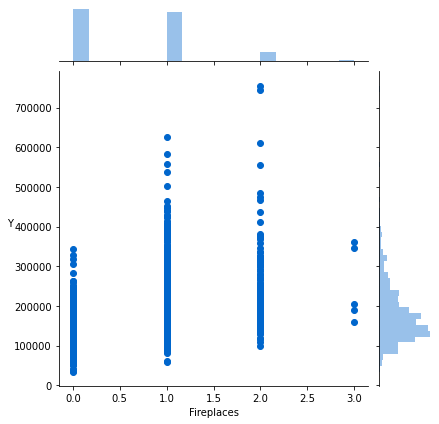

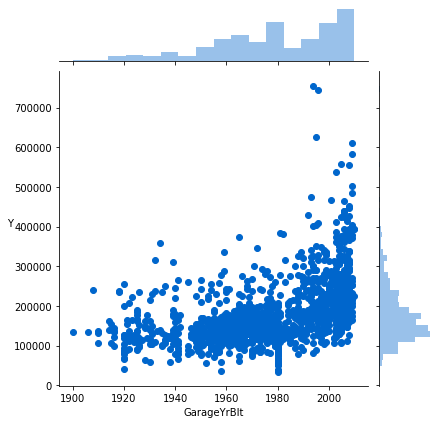

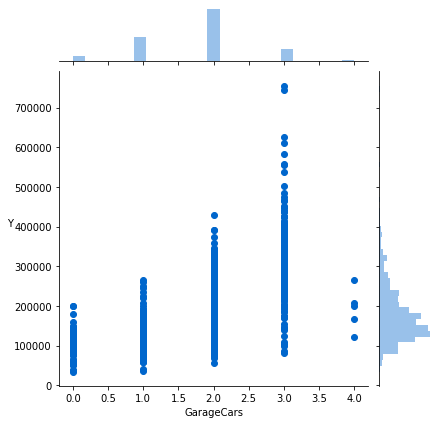

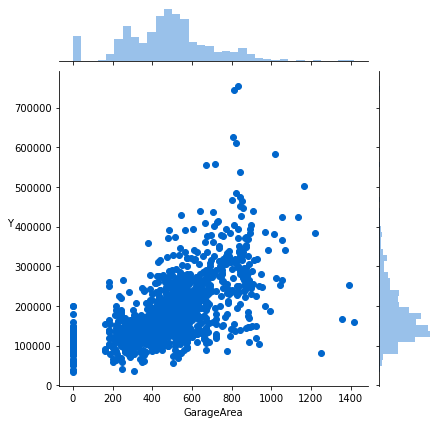

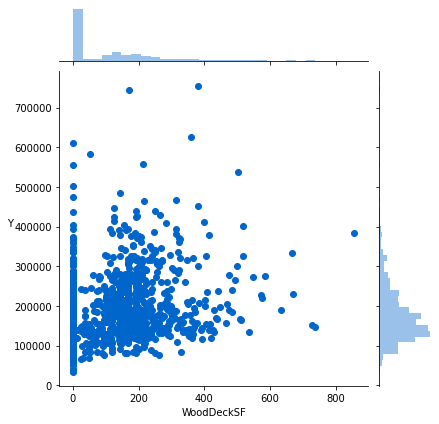

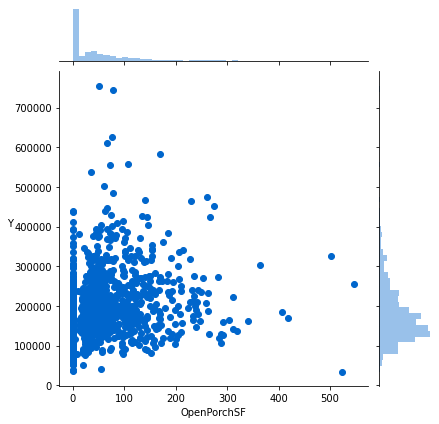

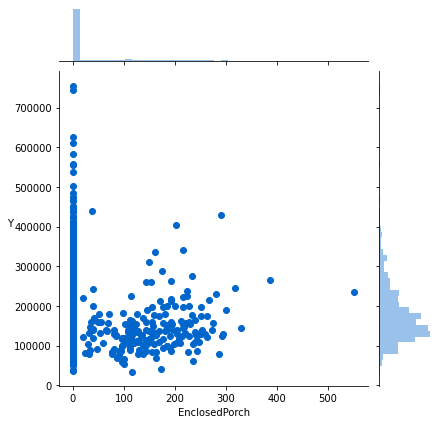

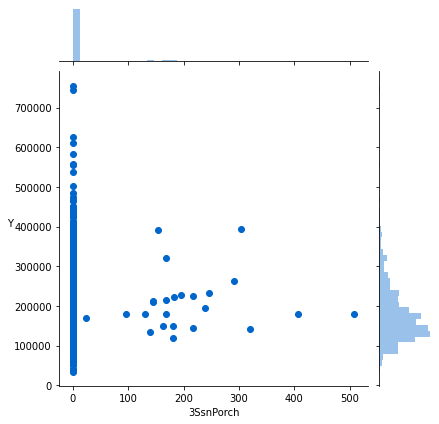

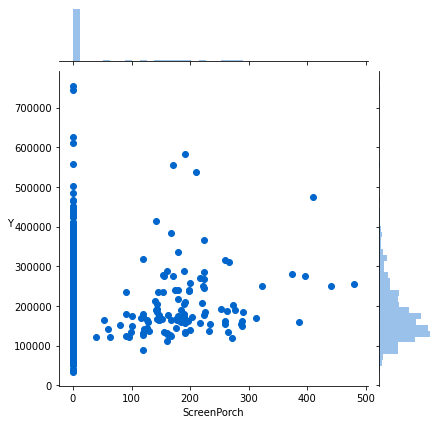

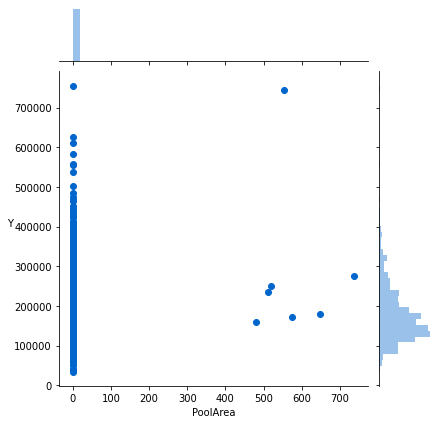

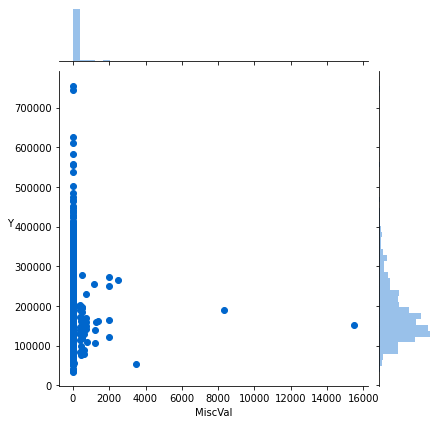

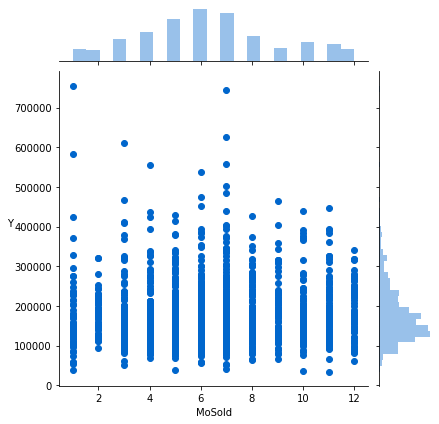

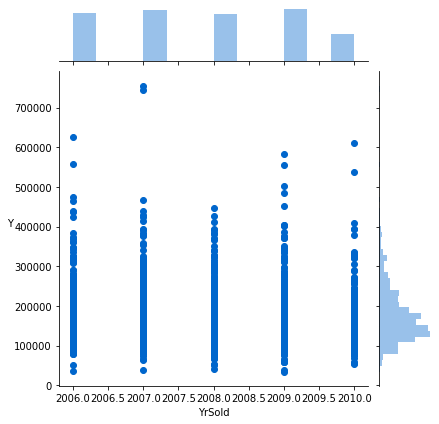

In [11]:
for c in number_features:
    g1 = sns.jointplot(x=c,y='SalePrice',data=train,kind='scatter',color='#0066CC')
    g1.ax_joint.set_ylabel('Y',rotation=0)

### 類別型

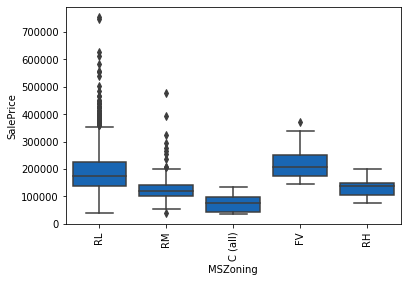

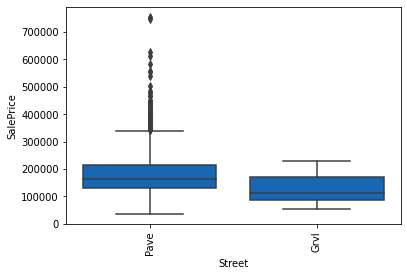

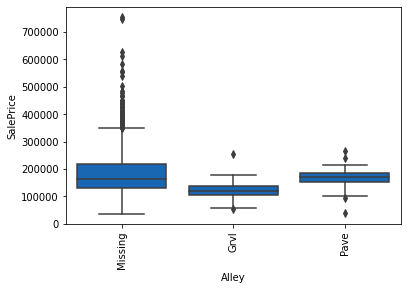

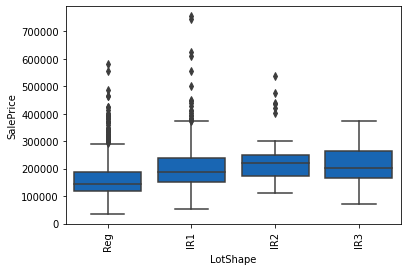

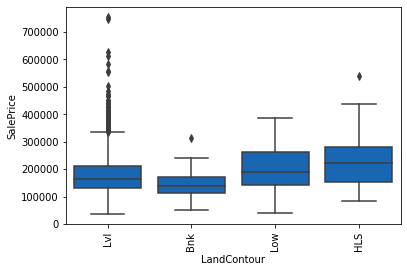

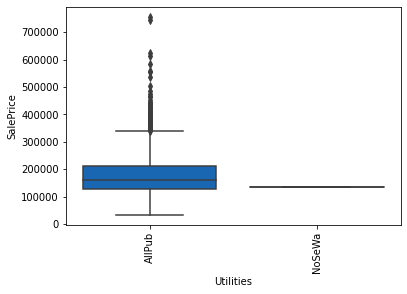

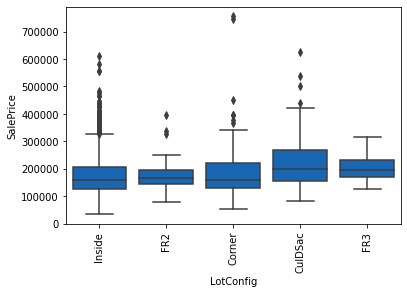

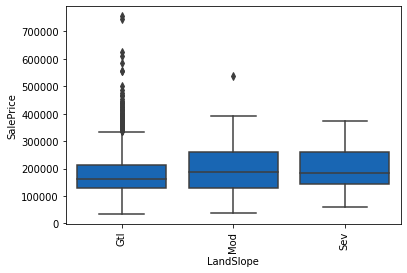

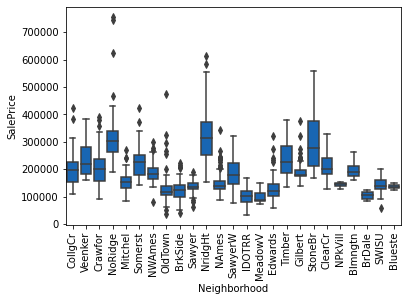

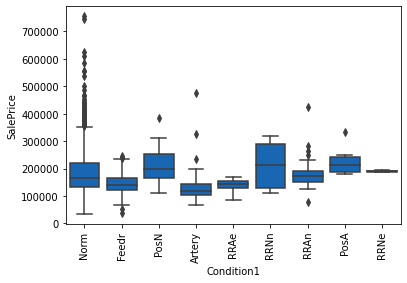

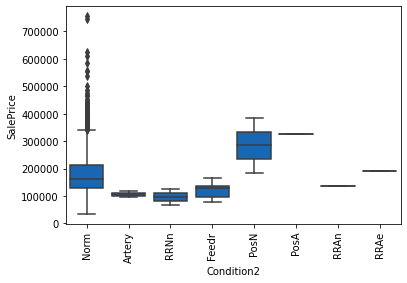

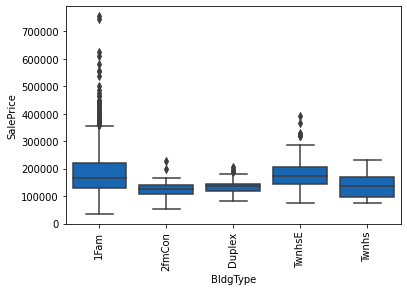

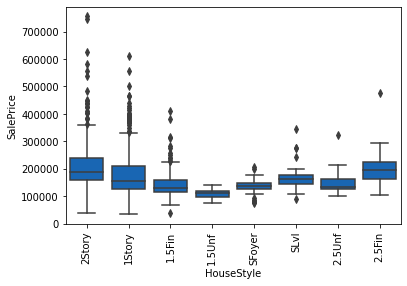

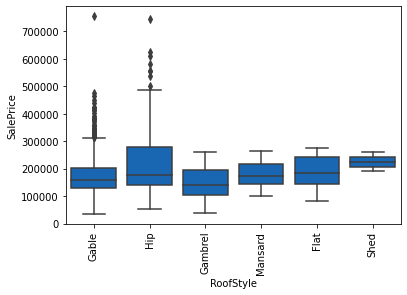

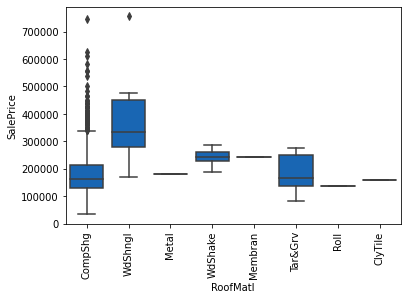

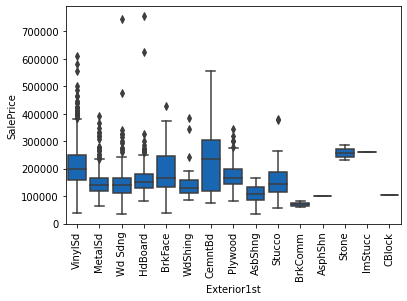

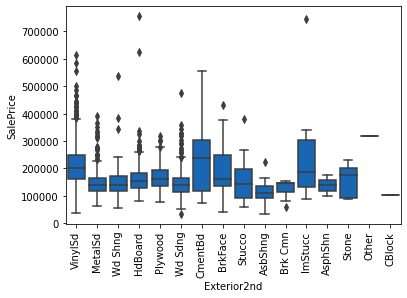

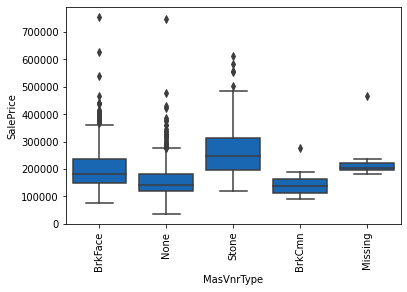

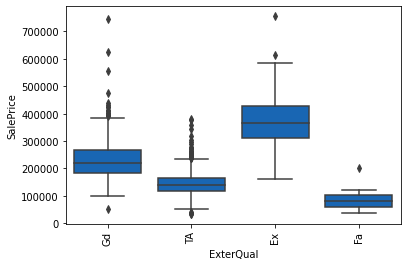

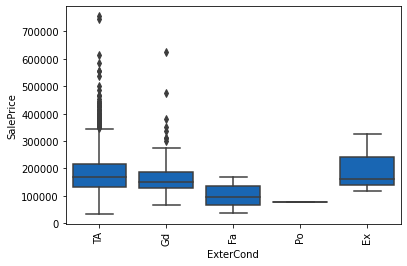

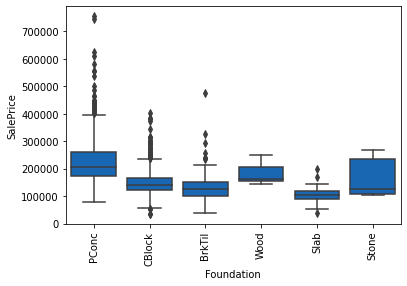

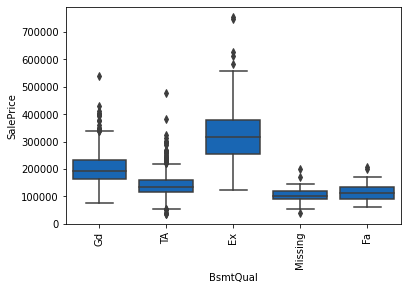

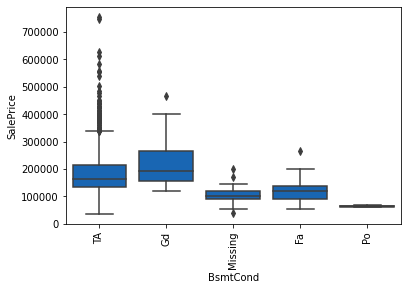

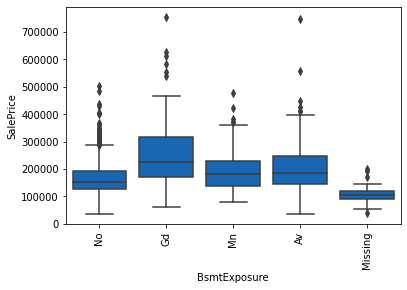

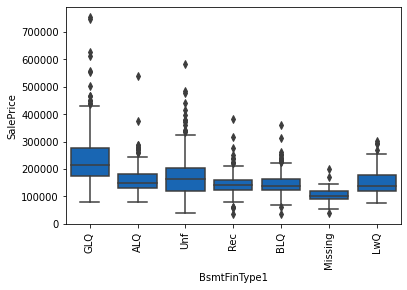

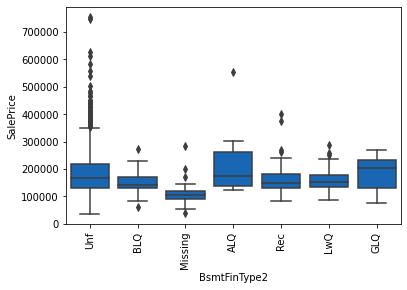

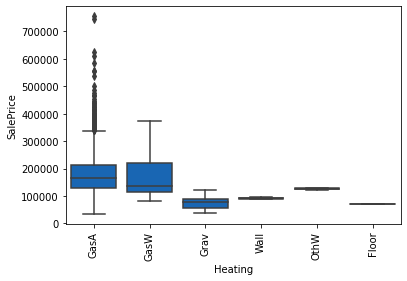

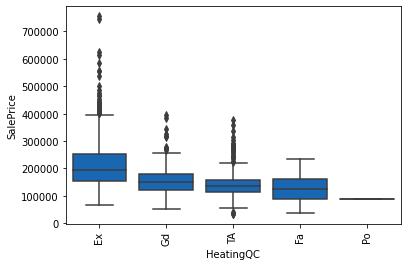

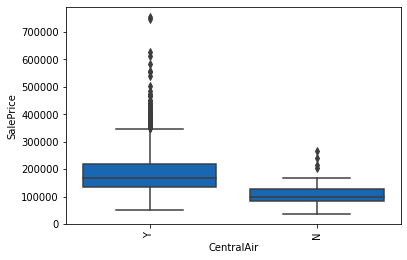

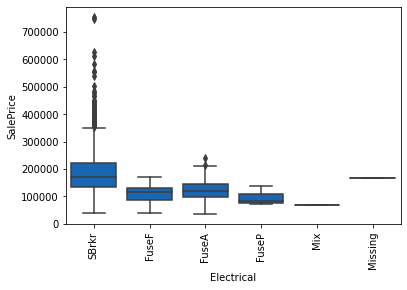

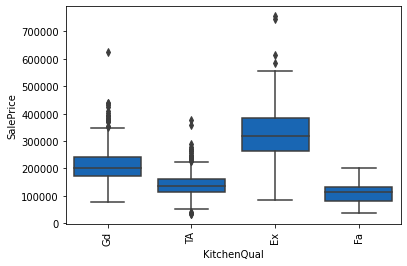

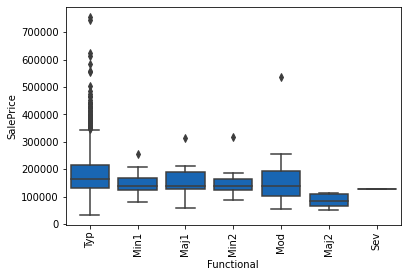

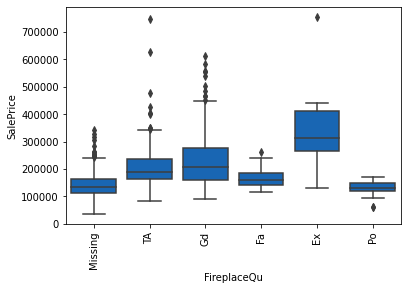

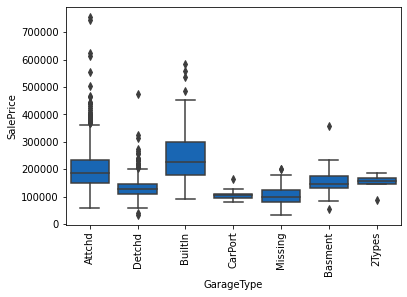

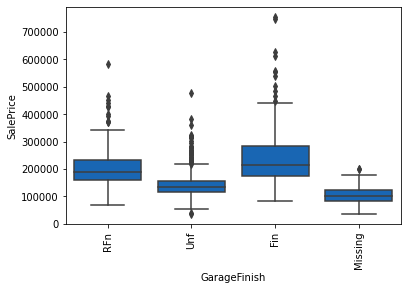

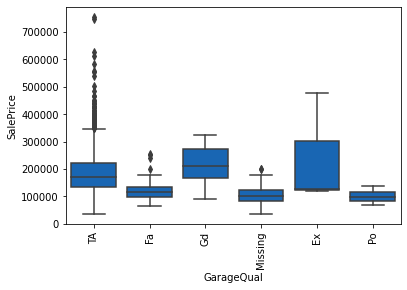

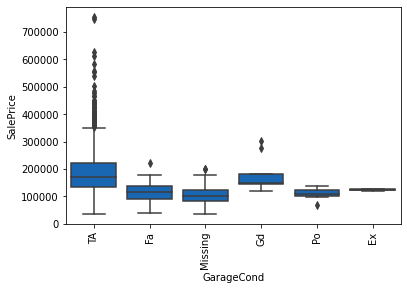

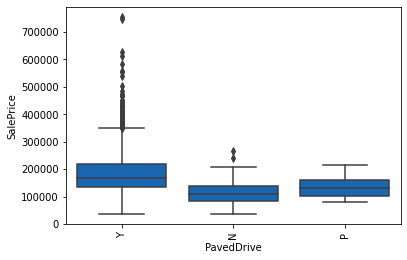

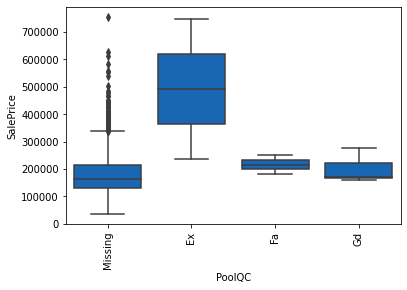

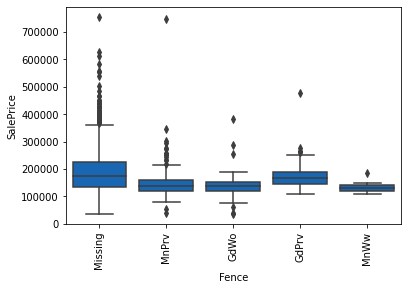

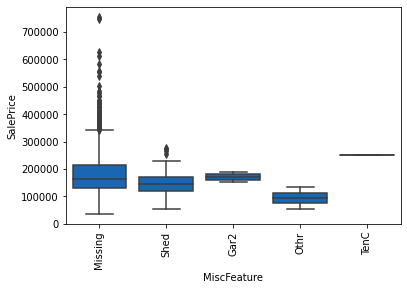

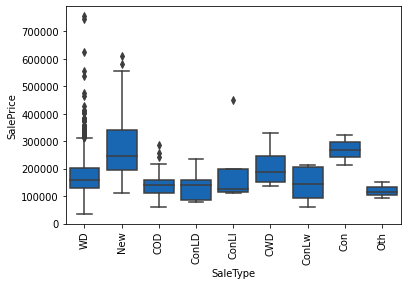

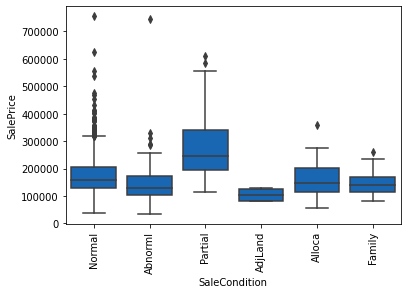

In [12]:
for c in object_features:
    sns.boxplot(x = c, y = 'SalePrice',data=train,color='#0066CC')
    plt.xticks(rotation=90)
    plt.show()

## 以ANOVA 衡量X 對 Y的變異

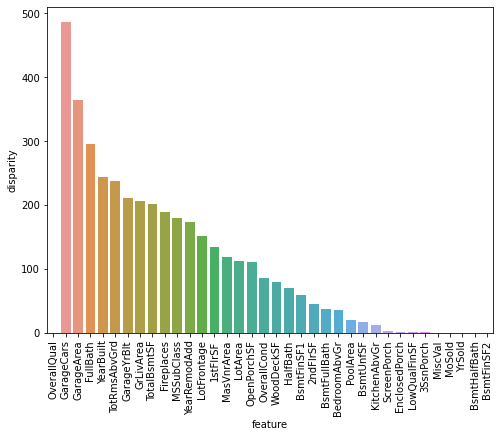

In [82]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = number_features
    pvals = []
    for c in number_features:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = st.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(train)
a['disparity'] = np.log(1./a['pval'].values)
plt.figure(1,figsize=(8, 6))
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

## X與Y的相關係數

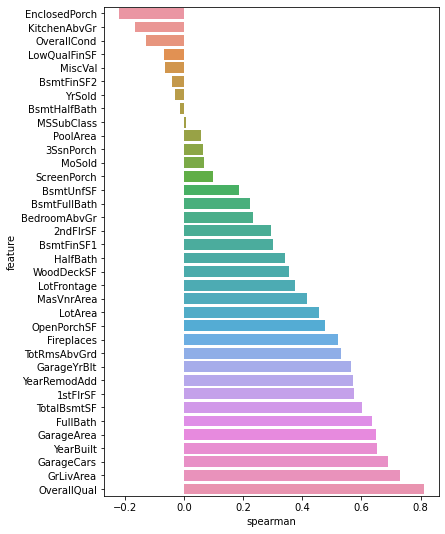

In [13]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = number_features
spearman(train, features)

## X的相關係數矩陣

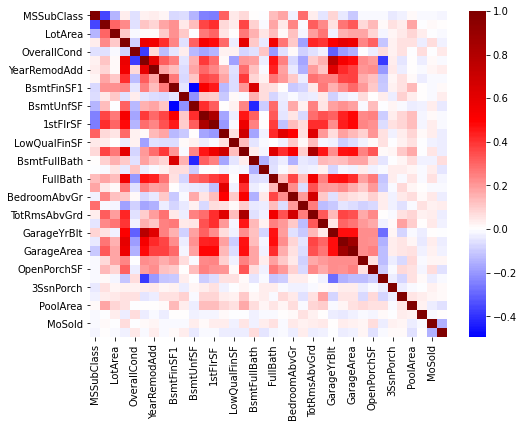

In [14]:
correlations = train.loc[:,number_features].corr()
plt.figure(1,figsize=(8, 6))
sns.heatmap(correlations,
            cmap = 'seismic',
#             annot=True,
            fmt ='0.1g',
            center = 0)
plt.show()

# 5. Features Selection

## 5.1 All Feature & Dummy Variable

In [9]:
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression

In [15]:
train_y = train['SalePrice']
train_y = np.log1p(train_y)

train_X = train[
                number_features 
#               + 
#                 object_features
                ]
train_X=pd.get_dummies(train_X, 
#                        drop_first = True
                       )

In [16]:
class Basic_Model:    
    def __init__(self, train_X, train_y, random_state):
        self.train_X = train_X
        self.train_y = train_y
        self.random_state = random_state
        
    def _mormalize(self):
        MMScaler = MinMaxScaler(feature_range=(0, 1))
        MMScaler.fit(self.train_X)
        self.train_X = MMScaler.transform(self.train_X)
        
    def _evaluate_model_cross_validation(self, folds = 5):
        OLS = LinearRegression()
        metric = 'neg_mean_squared_error'
        name = 'LinearRegression'
        scores = cross_val_score(OLS, self.train_X, self.train_y, scoring=metric, cv=folds, n_jobs=-1)
        mean_score, std_score = np.mean(scores), np.std(scores)
        print('>{} - training - MSE: {:,.5f} (+/-{:,.5f}) '.format(name, -mean_score, std_score))
        
    def main(self):
        self._mormalize()
        self._evaluate_model_cross_validation(folds = 5)

In [17]:
BM = Basic_Model(train_X= train_X, train_y= train_y, random_state= 12)
BM.main()

>LinearRegression - training - MSE: 0.02507 (+/-0.00995) 


## 5.2 PCA

In [18]:
from sklearn.decomposition import PCA

In [51]:
train_y = train['SalePrice']
train_y = np.log1p(train_y)

train_X = train[
                number_features 
#               + 
#                 object_features
                ]
# train_X=pd.get_dummies(train_X, 
# #                        drop_first = True
#                        )

In [73]:
class HP_Models():
    def __init__(self, train_X, train_y, random_state):
        self.train_X = train_X
        self.train_y = train_y
        self.random_state = random_state
        self.column_names = train_X.columns
        self.models= {
                'LinearRegression':LinearRegression()    
            }
    
    def dummies(self,drop_first=False):
        self.train_X=pd.get_dummies(train_X, 
                               drop_first = drop_first
                               )
        self.column_names = self.train_X.columns
    
    def standardize(self):
        self.scaler = StandardScaler()
        self.scaler.fit(self.train_X)
        self.train_X = self.scaler.transform(self.train_X)
    
    def normalize(self):
        self.MMScaler = MinMaxScaler(feature_range=(0, 1))
        self.MMScaler.fit(self.train_X)
        self.train_X = self.MMScaler.transform(self.train_X)
    
    def pca(self,n_components = 10):
        self.pca=PCA(n_components=n_components)
        self.pca.fit(train_X)
        self.train_X = self.pca.transform(train_X)
    
    def pca_analysis(self):
        pcs = np.array(self.pca.components_) # (n_comp, n_features)
        self.df_pc = pd.DataFrame(pcs, columns=self.column_names)
        self.df_pc.index = [f"第{c}主成分" for c in range(1,pca.components_.shape[0]+1) ]
        self.df_pc.style\
            .background_gradient(cmap='bwr_r', axis=None)\
            .format("{:.2}")
    
    def evaluate_model_cross_validation(self, model_name = 'LinearRegression', folds = 5):
        model = self.models[model_name]
        metric = 'neg_mean_squared_error'
        name = model_name
        scores = cross_val_score(model, self.train_X, self.train_y, scoring=metric, cv=folds, n_jobs=-1)
        mean_score, std_score = np.mean(scores), np.std(scores)
        print('>{} - training - MSE: {:,.5f} (+/-{:,.5f}) '.format(name, -mean_score, std_score))

In [74]:
HP = HP_Models(train_X= train_X, train_y= train_y, random_state= 12)

In [75]:
HP.dummies()

In [76]:
HP.standardize()
HP.normalize()
HP.pca(n_components = 10)

In [77]:
HP.pca_analysis()

In [80]:
np.round(HP.pca.explained_variance_ratio_, 2)

array([0.98, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [78]:
HP.df_pc.style\
            .background_gradient(cmap='bwr_r', axis=None)\
            .format("{:.2}")

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
第1主成分,-0.00059,0.00067,1.0,1.5e-05,-6.5e-07,4.5e-05,3e-05,0.0019,0.0098,0.0018,-0.0001,0.012,0.012,0.0022,2.3e-05,0.014,8.2e-06,1.1e-06,7e-06,7.3e-07,9.8e-06,-3.9e-07,3.1e-05,1.8e-05,-6.1e-05,1.2e-05,0.0039,0.0022,0.00057,-0.00011,6e-05,0.00024,0.00031,0.0019,3.4e-07,-1.9e-06
第2主成分,-0.0031,0.011,-0.023,0.0013,-0.00025,0.016,0.011,0.12,0.24,-0.01,0.25,0.48,0.42,0.19,0.003,0.62,0.0001,-1.1e-05,0.00044,0.00016,0.00037,1.2e-05,0.0015,0.00038,0.012,0.00058,0.17,0.044,0.031,-0.0047,0.0014,0.0074,0.0086,-0.038,0.00016,-5.5e-05
第3主成分,-0.019,0.0018,-0.0055,-0.00017,-0.0001,0.0081,-0.00071,0.0073,0.52,0.028,-0.22,0.33,0.25,-0.61,-0.0097,-0.37,0.00045,2.3e-05,-0.00027,-0.00038,-0.00062,-4e-05,-0.0012,-1.4e-05,0.002,-4.6e-06,0.026,0.01,-0.0099,-0.011,0.0014,0.00068,0.0011,-0.04,-0.00016,7.5e-05
第4主成分,0.019,-0.0002,-0.0055,4.9e-06,0.00021,-0.0014,-0.00055,0.031,0.5,0.01,-0.7,-0.19,-0.14,0.36,0.00092,0.23,0.00038,3.1e-05,2.5e-05,0.00031,0.00014,8.9e-07,0.00044,0.00015,-0.002,3.9e-06,0.01,0.024,0.0049,0.00029,-0.00095,0.005,0.0081,0.15,-5.9e-05,4.8e-05
第5主成分,-0.0049,0.00047,-0.0022,-1e-05,9.6e-05,-0.00032,0.0004,-0.0093,-0.044,-0.00087,0.11,0.066,0.046,-0.071,-0.00083,-0.026,-6.6e-05,-9.5e-06,-7e-06,-6.3e-05,-2.5e-05,2.7e-05,2.5e-05,-1e-05,-0.00019,-3.5e-05,-0.0031,-0.0047,-0.002,0.0014,0.00033,0.0033,0.0015,0.99,-2.2e-05,6.1e-06
第6主成分,-0.014,0.0071,-0.0028,-0.00086,0.0003,-0.029,-0.011,-0.14,-0.36,0.36,-0.33,-0.33,0.56,-0.3,0.024,0.29,-8.5e-05,3e-05,5e-05,-0.00039,0.00034,0.00018,0.001,0.00027,-0.02,-0.00024,-0.066,0.0085,-0.017,0.023,0.0014,0.013,0.0061,0.0026,0.00023,0.0001
第7主成分,0.0043,-0.0075,-0.00075,-0.0013,0.00051,-0.047,-0.018,-0.43,0.05,0.28,0.011,0.34,-0.1,0.12,0.03,0.05,0.00015,2.7e-05,-0.00033,-6.7e-05,0.00053,2.5e-05,9.3e-05,-3.5e-05,-0.039,-0.0023,-0.76,-0.052,0.0022,0.045,-0.005,0.011,0.02,-0.013,-0.0001,9.2e-05
第8主成分,-0.0032,0.00068,-0.00094,0.00095,-0.00013,0.034,0.011,0.1,-0.2,0.72,-0.15,0.37,-0.25,0.12,-0.022,-0.15,0.00036,5.6e-05,-3.6e-05,0.00038,-0.00036,-0.00021,-0.00075,-6.3e-05,0.022,0.0011,0.39,0.1,0.026,-0.017,-0.0068,0.02,-0.00093,0.0033,-0.00026,0.00014
第9主成分,0.018,-0.0078,0.00042,-0.00027,-0.00011,-0.0087,-0.016,0.87,-0.062,0.11,-0.034,0.01,0.024,-0.024,-0.0094,-0.0095,-0.0002,8.4e-05,-0.00019,0.0001,0.00013,1.2e-05,-5.9e-05,0.00018,-0.017,-0.0013,-0.47,-0.0067,-0.037,-0.0093,-0.0015,0.014,-0.013,0.004,-0.00054,0.00015
第10主成分,0.0085,-0.016,-0.00088,0.00041,0.00031,0.028,0.02,-0.036,-0.0042,-0.058,0.026,-0.036,0.004,-0.0099,-0.011,-0.017,0.00017,5.3e-05,0.00019,0.0001,-0.00018,-0.00013,-0.00014,0.0002,0.025,-9.9e-05,-0.096,0.99,-0.034,-0.067,-0.011,-0.073,0.0056,0.0023,0.00033,0.00033


In [79]:
HP.evaluate_model_cross_validation(model_name = 'LinearRegression')

>LinearRegression - training - MSE: 0.05292 (+/-0.01828) 


In [64]:
train_X.show()

AttributeError: 'DataFrame' object has no attribute 'show'

In [34]:
OLS = models['LinearRegression']

In [37]:
OLS.fit(train_X, train_y)

LinearRegression()

In [40]:
OLS.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [20]:
train_X.shape

(1460, 36)

In [21]:
pca=PCA(n_components=10)
pca.fit(train_X)
train_X = pca.transform(train_X)

In [22]:
BM = Basic_Model(train_X= train_X, train_y= train_y, random_state= 12)
BM.main()

>LinearRegression - training - MSE: 0.05292 (+/-0.01828) 


In [26]:
train_X = train[
                number_features 
#               + 
#                 object_features
                ]
train_X=pd.get_dummies(train_X, 
#                        drop_first = True
                       )

In [31]:
"""
解析英雄數據的前兩大主成份所代表的意涵。
顏色越突出代表其絕對值越大
"""
pcs = np.array(pca.components_) # (n_comp, n_features)

df_pc = pd.DataFrame(pcs, columns=train_X.columns)
df_pc.index = [f"第{c}主成分" for c in['一', '二', '三', '四', '五', '六', '七', '八', '九', '十']]
df_pc.style\
    .background_gradient(cmap='bwr_r', axis=None)\
    .format("{:.2}")

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
第一主成分,-0.00059,0.00067,1.0,1.5e-05,-6.5e-07,4.5e-05,3e-05,0.0019,0.0098,0.0018,-0.0001,0.012,0.012,0.0022,2.3e-05,0.014,8.2e-06,1.1e-06,7e-06,7.3e-07,9.8e-06,-3.9e-07,3.1e-05,1.8e-05,-6.1e-05,1.2e-05,0.0039,0.0022,0.00057,-0.00011,6e-05,0.00024,0.00031,0.0019,3.4e-07,-1.9e-06
第二主成分,-0.0031,0.011,-0.023,0.0013,-0.00025,0.016,0.011,0.12,0.24,-0.01,0.25,0.48,0.42,0.19,0.003,0.62,0.0001,-1.1e-05,0.00044,0.00016,0.00037,1.2e-05,0.0015,0.00038,0.012,0.00058,0.17,0.044,0.031,-0.0047,0.0014,0.0074,0.0086,-0.038,0.00016,-5.5e-05
第三主成分,-0.019,0.0018,-0.0055,-0.00017,-0.0001,0.0081,-0.00071,0.0073,0.52,0.028,-0.22,0.33,0.25,-0.61,-0.0097,-0.37,0.00045,2.3e-05,-0.00027,-0.00038,-0.00062,-4e-05,-0.0012,-1.4e-05,0.002,-4.6e-06,0.026,0.01,-0.0099,-0.011,0.0014,0.00068,0.0011,-0.04,-0.00016,7.5e-05
第四主成分,0.019,-0.0002,-0.0055,4.9e-06,0.00021,-0.0014,-0.00055,0.031,0.5,0.01,-0.7,-0.19,-0.14,0.36,0.00092,0.23,0.00038,3.1e-05,2.5e-05,0.00031,0.00014,8.9e-07,0.00044,0.00015,-0.002,3.9e-06,0.01,0.024,0.0049,0.00029,-0.00095,0.005,0.0081,0.15,-5.9e-05,4.8e-05
第五主成分,-0.0049,0.00047,-0.0022,-1e-05,9.6e-05,-0.00032,0.0004,-0.0093,-0.044,-0.00087,0.11,0.066,0.046,-0.071,-0.00083,-0.026,-6.6e-05,-9.5e-06,-7e-06,-6.3e-05,-2.5e-05,2.7e-05,2.5e-05,-1e-05,-0.00019,-3.5e-05,-0.0031,-0.0047,-0.002,0.0014,0.00033,0.0033,0.0015,0.99,-2.2e-05,6.1e-06
第六主成分,-0.014,0.0071,-0.0028,-0.00086,0.0003,-0.029,-0.011,-0.14,-0.36,0.36,-0.33,-0.33,0.56,-0.3,0.024,0.29,-8.5e-05,3e-05,5e-05,-0.00039,0.00034,0.00018,0.001,0.00027,-0.02,-0.00024,-0.066,0.0085,-0.017,0.023,0.0014,0.013,0.0061,0.0026,0.00023,0.0001
第七主成分,0.0043,-0.0075,-0.00075,-0.0013,0.00051,-0.047,-0.018,-0.43,0.05,0.28,0.011,0.34,-0.1,0.12,0.03,0.05,0.00015,2.7e-05,-0.00033,-6.7e-05,0.00053,2.5e-05,9.3e-05,-3.5e-05,-0.039,-0.0023,-0.76,-0.052,0.0022,0.045,-0.005,0.011,0.02,-0.013,-0.0001,9.2e-05
第八主成分,-0.0032,0.00068,-0.00094,0.00095,-0.00013,0.034,0.011,0.1,-0.2,0.72,-0.15,0.37,-0.25,0.12,-0.022,-0.15,0.00036,5.6e-05,-3.6e-05,0.00038,-0.00036,-0.00021,-0.00075,-6.3e-05,0.022,0.0011,0.39,0.1,0.026,-0.017,-0.0068,0.02,-0.00093,0.0033,-0.00026,0.00014
第九主成分,0.018,-0.0078,0.00042,-0.00027,-0.00011,-0.0087,-0.016,0.87,-0.062,0.11,-0.034,0.01,0.024,-0.024,-0.0094,-0.0095,-0.0002,8.4e-05,-0.00019,0.0001,0.00013,1.2e-05,-5.9e-05,0.00018,-0.017,-0.0013,-0.47,-0.0067,-0.037,-0.0093,-0.0015,0.014,-0.013,0.004,-0.00054,0.00015
第十主成分,0.0085,-0.016,-0.00088,0.00041,0.00031,0.028,0.02,-0.036,-0.0042,-0.058,0.026,-0.036,0.004,-0.0099,-0.011,-0.017,0.00017,5.3e-05,0.00019,0.0001,-0.00018,-0.00013,-0.00014,0.0002,0.025,-9.9e-05,-0.096,0.99,-0.034,-0.067,-0.011,-0.073,0.0056,0.0023,0.00033,0.00033


In [45]:
list(range(1,pca.components_.shape[0]+1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [25]:
train_X

array([[-2065.54192999,    18.45060438,  -285.21163921, ...,
           47.41972156,    13.39269847,  -108.84800306],
       [ -912.03862117,   -10.34713451,   743.6905803 , ...,
          -46.62328978,   -98.08776469,   203.85662953],
       [  734.16193169,    86.88488471,  -472.3145262 , ...,
           62.2931558 ,   -36.97625753,  -110.55982927],
       ...,
       [-1458.10235925,   644.2712507 , -1008.372175  , ...,
         -136.23722355,    -7.64074158,   -73.59714843],
       [ -809.87359054,  -633.66805943,   304.26624646, ...,
          850.01880057,   175.76477815,   229.49786078],
       [ -576.01244944,  -113.90908682,   702.57740799, ...,
          189.17953403,    27.68333769,   629.92509055]])

In [32]:
train_X.shape

(1460, 10)

In [126]:
submit_data = test['Id']
test = missing_etl(dt = test, object_features = object_features, number_features = number_features)
test_X = test[number_features 
#                 + object_features
                ]
test_X=pd.get_dummies(test_X, 
#                       drop_first = True
                       )

In [128]:
test_X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [68]:
scores

array([-8.52768620e+08, -1.22266716e+09, -1.34538510e+09, -9.23363555e+08,
       -2.63134785e+09])

In [95]:
train_y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [ ]:
#X_test = X_test[X_train.columns]
miss_columns = set(X_train.columns) - set(X_test.columns)
 
#add missing dummy columns
for col in miss_columns:
    X_test[col] = 0
    
adu_columns = set(X_test.columns) - set(X_train.columns)
#delete adundant columns:
X_test.drop(list(adu_columns),axis=1,inplace=True)

————————————————
版权声明：本文为CSDN博主「momottyy」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/maotianyi941005/article/details/88582464